## 1. Mise en forme des données

#### Réseau de convolution
Un réseau de convolution doit être constitué de couche de convolution avec des couches de pooling, une couche flatten, des couches denses avec une activation Relu, on peut y ajouter des dropout et enfin un softmax pour finir.

Pour les entrées, il faut normaliser les images en les divisant par 255 pour avoir des valeurs compris entre 0 et 1. \
Pour l'utilisation de **sparse_categorical_crossentropy** il ne faut pas que les labels soient des vecteurs one-hot mais plutot des entiers.

*Pourquoi ces transformation* :\
Il n'y a donc pas besoin de transformer les labels en one-hot car la fonction **sparse_categorical_crossentropy** s'attend à recevoir des entiers. \
Et normaliser les images aide à avoir un meilleure apprentissage pour le modèle.

In [1]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

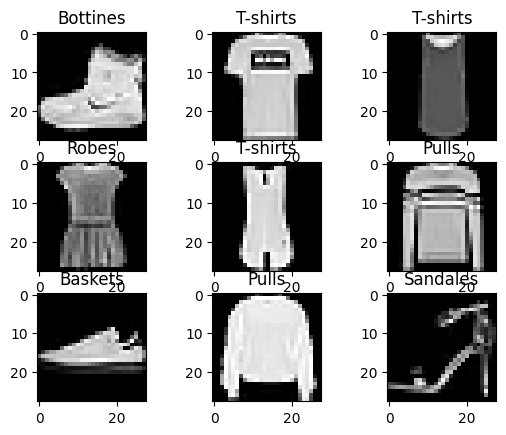

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_names = ['T-shirts', 'Pantalons', 'Pulls', 'Robes', 'Manteaux',
               'Sandales', 'Chemises', 'Baskets', 'Sacs', 'Bottines']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(label_names[y_train[i]])
plt.show()

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## 2. Création d’un premier modèle 

La couche de sortie dois être un softmax car nous avons une classification multiple à faire, avec un nombre de neurones égale au nombre de classe (10 pour nous, de 0 à 9)

In [4]:
model_un = tf.keras.models.Sequential()
model_un.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_un.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_un.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_un.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_un.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_un.add(tf.keras.layers.Flatten())
model_un.add(tf.keras.layers.Dense(256, activation='relu'))
model_un.add(tf.keras.layers.Dense(128, activation='relu'))
model_un.add(tf.keras.layers.Dense(10, activation='softmax'))

model_un.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,298 (954.29 KB)

 Non-trainable params: 0 (0.00 B)

Il y a un total de 244,298 paramètres à caler. Pour la première convolution : 5 * 5 * 16 + 16 = 416. On peut constater le nombre de paramètre détailler sur le "summary".

In [5]:
model_un.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_un.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6967 - loss: 0.8464 - val_accuracy: 0.8553 - val_loss: 0.4150
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8600 - loss: 0.3932 - val_accuracy: 0.8717 - val_loss: 0.3616
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8767 - loss: 0.3318 - val_accuracy: 0.8788 - val_loss: 0.3424
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8889 - loss: 0.3087 - val_accuracy: 0.8867 - val_loss: 0.3089
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8985 - loss: 0.2784 - val_accuracy: 0.8974 - val_loss: 0.2840
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9034 - loss: 0.2594 - val_accuracy: 0.8888 - val_loss: 0.3026
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9146 - loss: 0.2320 - val_accuracy: 0.8946 - val_loss: 0.2911
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9163 - loss: 0.2219 - val_accuracy: 0.

<Axes: >

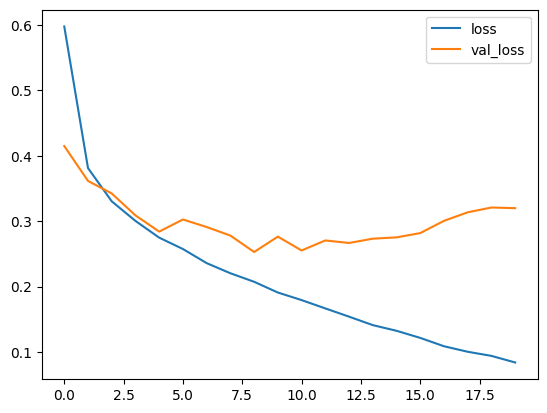

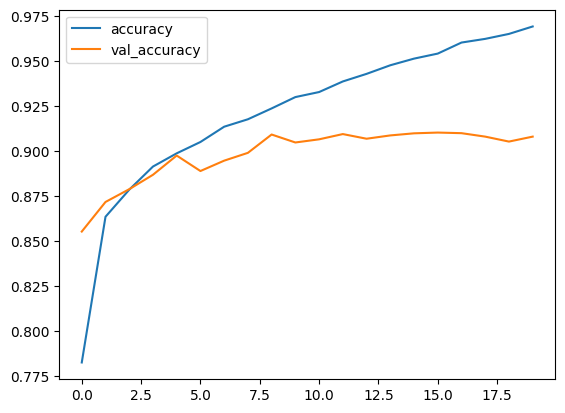

In [6]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le modèle attaint une précision d'entrainement d'environ 97% avec une validation de 90%, ce qui est bien. Mais on remarque un petit surapprentissage (la perte de validation remonte en fin d'entrainement alors que la perte d'entraînement continue de baisser)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5520 - loss: 1.2248 - val_accuracy: 0.8029 - val_loss: 0.5116
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7836 - loss: 0.5796 - val_accuracy: 0.8426 - val_loss: 0.4346
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8137 - loss: 0.5073 - val_accuracy: 0.8586 - val_loss: 0.3874
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8320 - loss: 0.4589 - val_accuracy: 0.8612 - val_loss: 0.3669
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8383 - loss: 0.4395 - val_accuracy: 0.8759 - val_loss: 0.3348
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8500 - loss: 0.4109 - val_accuracy: 0.8780 - val_loss: 0.3265
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8523 - loss: 0.4019 - val_accuracy: 0.8844 - val_loss: 0.3160
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8637 - loss: 0.3737 - val_accuracy: 0.

<Axes: >

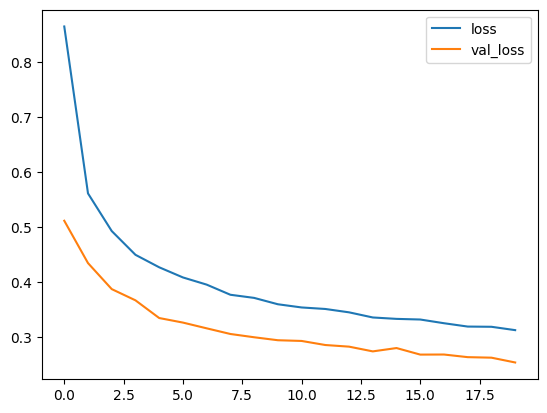

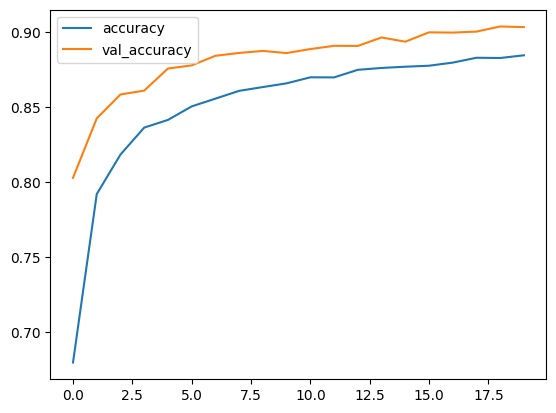

In [7]:
model_deux = tf.keras.models.Sequential()
model_deux.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_deux.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_deux.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_deux.add(tf.keras.layers.Dropout(0.4))

model_deux.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_deux.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_deux.add(tf.keras.layers.Dropout(0.4))

model_deux.add(tf.keras.layers.Flatten())
model_deux.add(tf.keras.layers.Dense(256, activation='relu'))
model_deux.add(tf.keras.layers.Dropout(0.4))
model_deux.add(tf.keras.layers.Dense(128, activation='relu'))
model_deux.add(tf.keras.layers.Dropout(0.4))
model_deux.add(tf.keras.layers.Dense(10, activation='softmax'))

model_deux.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_deux.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le model avec les dropout obtient de bonnes performances en limitant le surapprentissage grâce au dropout, la courbe de validation reste proche de la courbe d'entraînement.

Je ne pense pas que ce soit judicieux d'ajouter plus de 20 epochs mais pour tester le modele et voir les différences nous pourrions tester.

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4512 - loss: 1.4445 - val_accuracy: 0.7837 - val_loss: 0.5403
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7582 - loss: 0.6356 - val_accuracy: 0.8257 - val_loss: 0.4660
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7976 - loss: 0.5437 - val_accuracy: 0.8476 - val_loss: 0.4159
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8158 - loss: 0.5021 - val_accuracy: 0.8554 - val_loss: 0.3864
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8325 - loss: 0.4683 - val_accuracy: 0.8624 - val_loss: 0.3727
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8382 - loss: 0.4370 - val_accuracy: 0.8710 - val_loss: 0.3527
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8443 - loss: 0.4244 - val_accuracy: 0.8791 - val_loss: 0.3377
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8530 - loss: 0.4085 - val_accuracy: 0.

<Axes: >

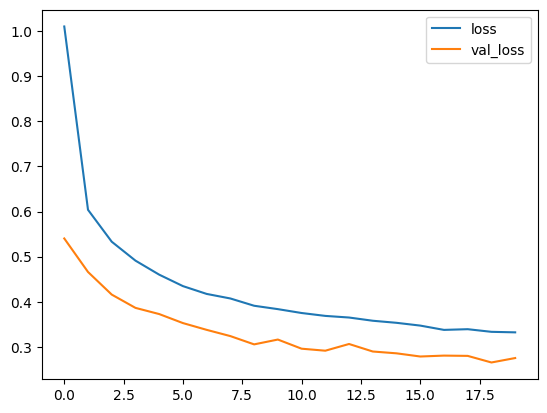

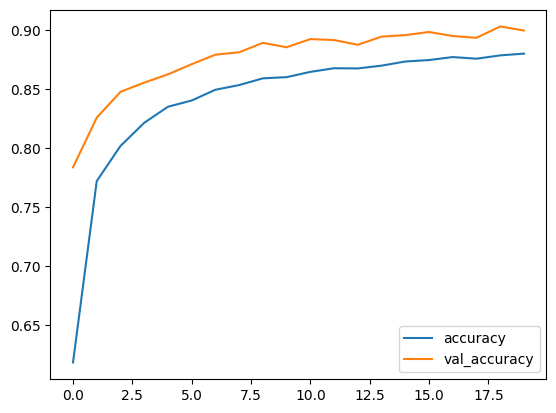

In [8]:
model_trois = tf.keras.models.Sequential()
model_trois.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model_trois.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_trois.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_trois.add(tf.keras.layers.Dropout(0.4))

model_trois.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_trois.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_trois.add(tf.keras.layers.Dropout(0.4))

model_trois.add(tf.keras.layers.Flatten())
model_trois.add(tf.keras.layers.Dense(256, activation='relu'))
model_trois.add(tf.keras.layers.Dropout(0.4))
model_trois.add(tf.keras.layers.Dense(128, activation='relu'))
model_trois.add(tf.keras.layers.Dropout(0.4))
model_trois.add(tf.keras.layers.Dense(128, activation='relu'))
model_trois.add(tf.keras.layers.Dropout(0.4))
model_trois.add(tf.keras.layers.Dense(10, activation='softmax'))

model_trois.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_trois.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant une couche de 128 notre modèle, il n'est pas vraiment améliorer. Je pense qu'il faudrait enlever la dernière couche car les résultats obtenus sont équivalent et je ne pense pas que le modèle puisse être plus améliorer que ce qu'on à maitenant.

## 3. Traitement des données cifar

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
y_train.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

Les données sont de type numpy.ndarray. La forme des données d'entrée pour le train est (50000, 32, 32, 3) et pour le test est (10000, 32, 32, 3). Les targets pour le train ont la forme (50000, 1) et pour le test ont la forme (10000, 1). Ce qui indique que la taille des images est de 32 x 32 pixels et sont en couleurs.

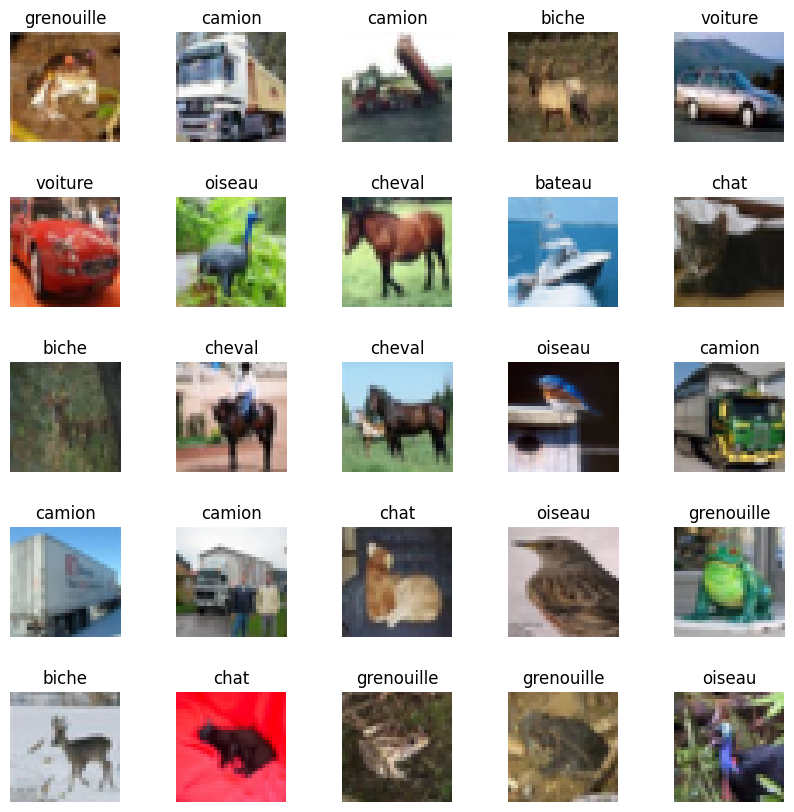

In [11]:
target_names = ['avion', 'voiture', 'oiseau', 'chat', 'biche', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(X_train[i])
    plt.title(target_names[y_train[i][0]])
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [12]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,210 (1.28 MB)

 Trainable params: 335,210 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2478 - loss: 8.0719 - val_accuracy: 0.4286 - val_loss: 1.5861
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4611 - loss: 1.5000 - val_accuracy: 0.4803 - val_loss: 1.4610
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5301 - loss: 1.3193 - val_accuracy: 0.4968 - val_loss: 1.4304
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5873 - loss: 1.1739 - val_accuracy: 0.5268 - val_loss: 1.3616
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6257 - loss: 1.0568 - val_accuracy: 0.5290 - val_loss: 1.4076
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6639 - loss: 0.9577 - val_accuracy: 0.5200 - val_loss: 1.4572
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7016 - loss: 0.8448 - val_accuracy: 0.5349 - val_loss: 1.4175
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7393 - loss: 0.7450 - val_accuracy: 0.

<Axes: >

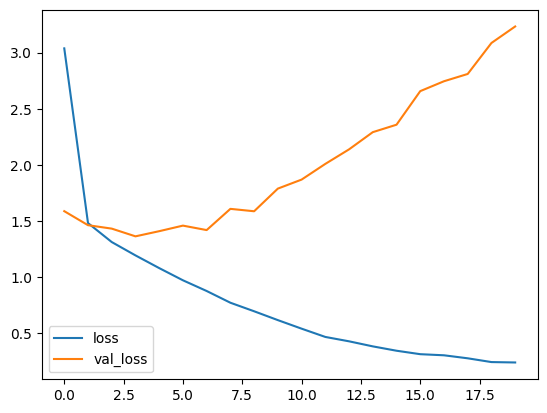

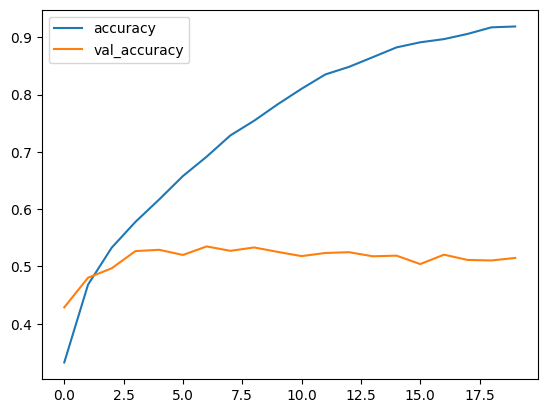

In [13]:
model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

On constate un gros surapprentissage pour ce modele.

In [14]:
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32')
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32')

X_train /= 255
X_test /= 255

Je pense qu'en normalisant les images le modèle devrait être amélioré.

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2433 - loss: 2.0082 - val_accuracy: 0.4485 - val_loss: 1.5159
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4345 - loss: 1.5421 - val_accuracy: 0.5212 - val_loss: 1.3370
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4975 - loss: 1.4014 - val_accuracy: 0.5567 - val_loss: 1.2330
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5387 - loss: 1.2976 - val_accuracy: 0.5755 - val_loss: 1.1890
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5695 - loss: 1.2153 - val_accuracy: 0.6138 - val_loss: 1.1066
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5979 - loss: 1.1563 - val_accuracy: 0.6071 - val_loss: 1.1211
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6110 - loss: 1.1110 - val_accuracy: 0.6149 - val_loss: 1.0970
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6294 - loss: 1.0604 - val_accuracy: 0.

<Axes: >

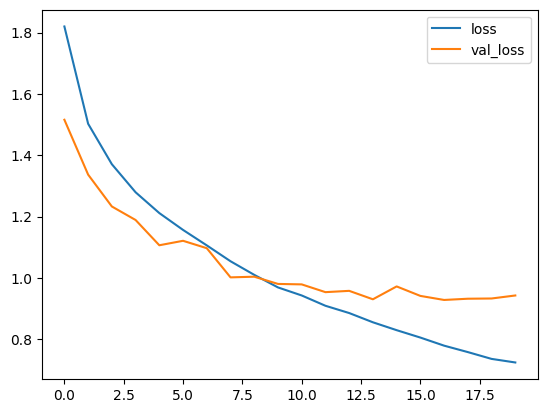

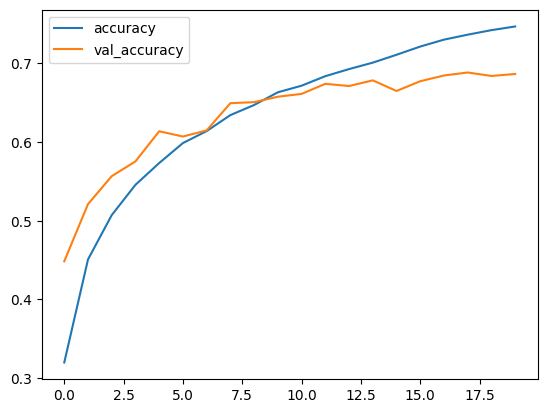

In [15]:
model_cifar_deux = tf.keras.models.Sequential()
model_cifar_deux.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar_deux.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar_deux.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_deux.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar_deux.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_deux.add(tf.keras.layers.Flatten())
model_cifar_deux.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_deux.add(tf.keras.layers.Dropout(0.5))
model_cifar_deux.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar_deux.add(tf.keras.layers.Dropout(0.5))
model_cifar_deux.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_deux.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_deux.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Les résultats en généralisant les données sont améliorer, les validations suivent la même tendance ce qui est un bon point.
Grâce au Dropout et à la normalisation le modele apprend mieux il atteint environ 70% de validation et nous évitons le surapprentissage.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


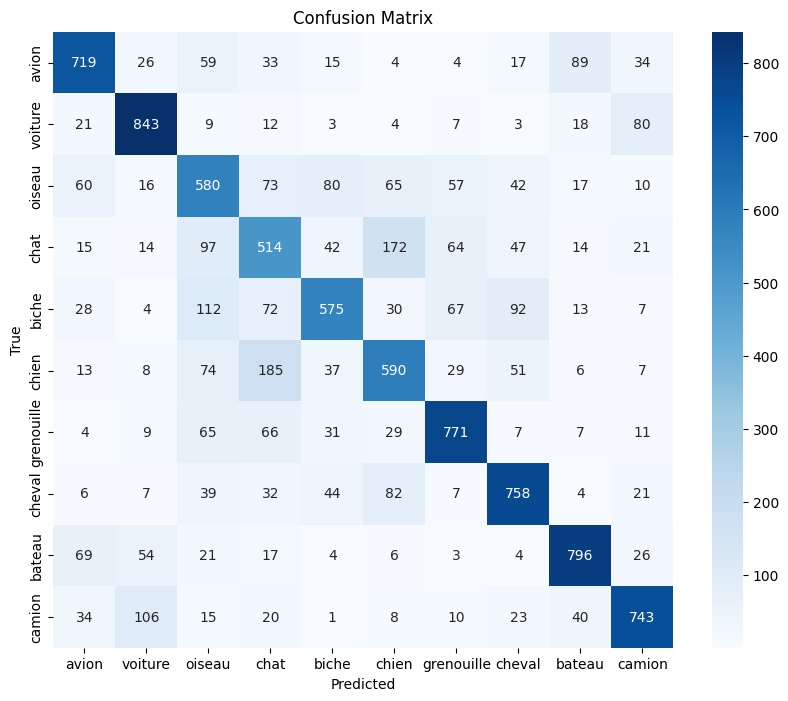

              precision    recall  f1-score   support

       avion       0.74      0.72      0.73      1000
     voiture       0.78      0.84      0.81      1000
      oiseau       0.54      0.58      0.56      1000
        chat       0.50      0.51      0.51      1000
       biche       0.69      0.57      0.63      1000
       chien       0.60      0.59      0.59      1000
  grenouille       0.76      0.77      0.76      1000
      cheval       0.73      0.76      0.74      1000
      bateau       0.79      0.80      0.79      1000
      camion       0.77      0.74      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [16]:
y_pred = model_cifar_deux.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

La classe la moins bien évalué est la classe des chats.

## 4. Amélioration du modèle

En ajoutant deux nouvelles couches de convolution avec des couches de pooling le modèle risque d'être en sur apprentissage. Mais surtout avec les nouvelles couches de pooling l'image risque d'être trop réduite.

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2233 - loss: 2.0539 - val_accuracy: 0.4294 - val_loss: 1.5536
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4067 - loss: 1.6103 - val_accuracy: 0.4801 - val_loss: 1.4065
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4840 - loss: 1.4271 - val_accuracy: 0.4962 - val_loss: 1.3858
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5288 - loss: 1.3177 - val_accuracy: 0.5661 - val_loss: 1.2211
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5753 - loss: 1.2077 - val_accuracy: 0.6042 - val_loss: 1.1020
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5975 - loss: 1.1515 - val_accuracy: 0.6146 - val_loss: 1.0867
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6150 - loss: 1.0940 - val_accuracy: 0.6218 - val_loss: 1.0594
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6241 - loss: 1.0647 - val_accu

<Axes: >

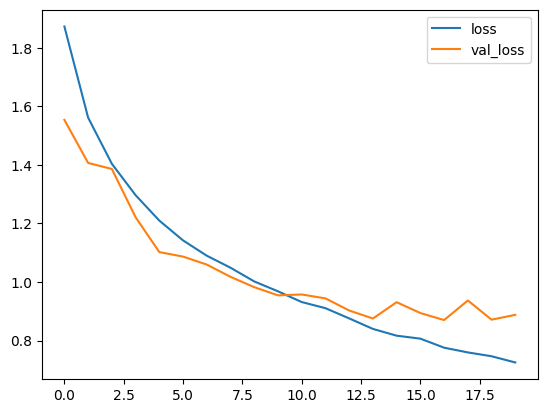

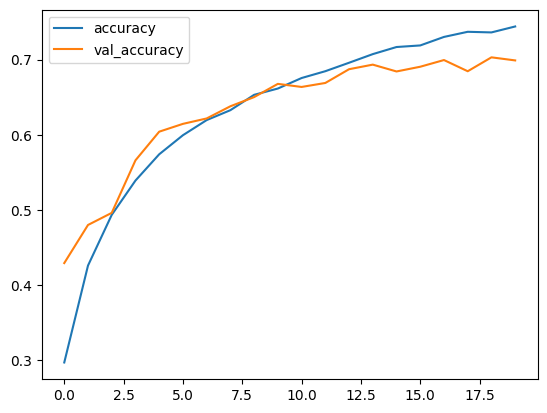

In [17]:
model_cifar_trois = tf.keras.models.Sequential()
model_cifar_trois.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar_trois.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model_cifar_trois.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))

model_cifar_trois.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu')) 
model_cifar_trois.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_trois.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar_trois.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_trois.add(tf.keras.layers.Flatten())
model_cifar_trois.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_trois.add(tf.keras.layers.Dropout(0.5))
model_cifar_trois.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar_trois.add(tf.keras.layers.Dropout(0.5))
model_cifar_trois.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_trois.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_trois.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [18]:
model_cifar_trois.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 746,912 (2.85 MB)

 Trainable params: 248,970 (972.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 497,942 (1.90 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


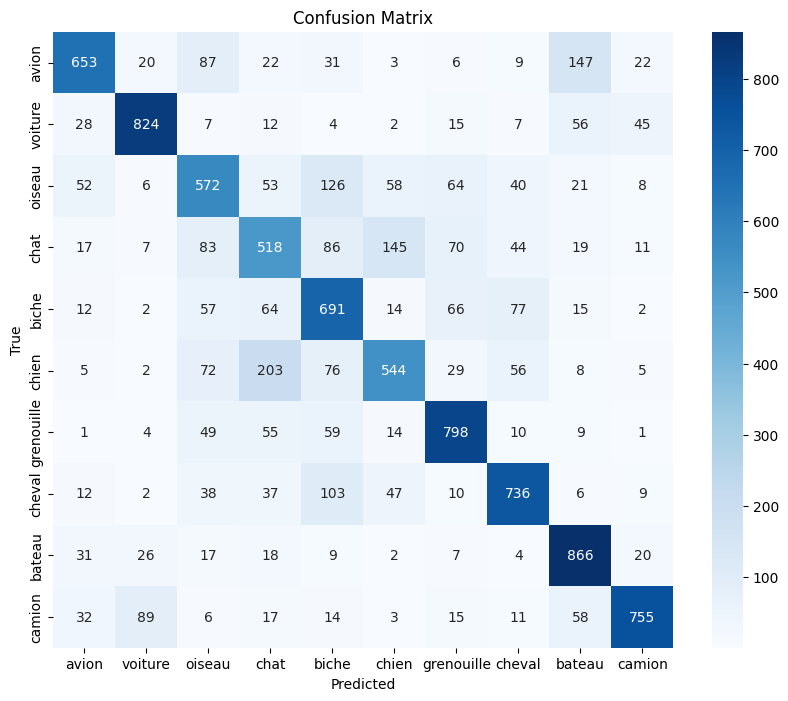

              precision    recall  f1-score   support

       avion       0.77      0.65      0.71      1000
     voiture       0.84      0.82      0.83      1000
      oiseau       0.58      0.57      0.58      1000
        chat       0.52      0.52      0.52      1000
       biche       0.58      0.69      0.63      1000
       chien       0.65      0.54      0.59      1000
  grenouille       0.74      0.80      0.77      1000
      cheval       0.74      0.74      0.74      1000
      bateau       0.72      0.87      0.79      1000
      camion       0.86      0.76      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [19]:
y_pred = model_cifar_trois.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2166 - loss: 2.0827 - val_accuracy: 0.4625 - val_loss: 1.4925
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4359 - loss: 1.5622 - val_accuracy: 0.5420 - val_loss: 1.2858
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5198 - loss: 1.3431 - val_accuracy: 0.6002 - val_loss: 1.1212
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5791 - loss: 1.1931 - val_accuracy: 0.6332 - val_loss: 1.0402
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6105 - loss: 1.1055 - val_accuracy: 0.6469 - val_loss: 1.0108
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6354 - loss: 1.0394 - val_accuracy: 0.6522 - val_loss: 0.9756
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6626 - loss: 0.9690 - val_accuracy: 0.6724 - val_loss: 0.9343
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6769 - loss: 0.9231 - val_accu

<Axes: >

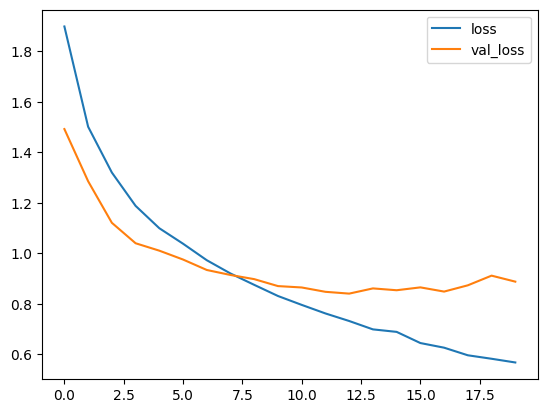

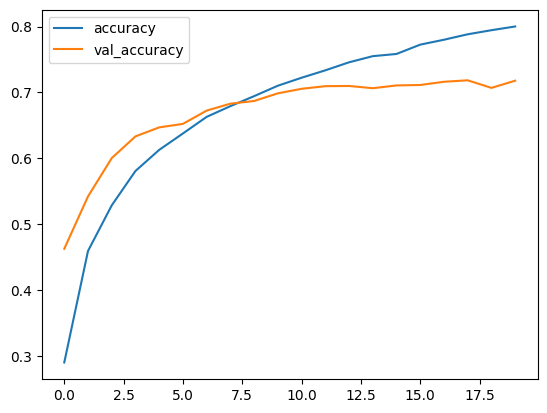

In [20]:
model_cifar_quatre = tf.keras.models.Sequential()
model_cifar_quatre.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar_quatre.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_quatre.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))

model_cifar_quatre.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_quatre.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_quatre.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar_quatre.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_quatre.add(tf.keras.layers.Flatten())
model_cifar_quatre.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_quatre.add(tf.keras.layers.Dropout(0.5))
model_cifar_quatre.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar_quatre.add(tf.keras.layers.Dropout(0.5))
model_cifar_quatre.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_quatre.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_quatre.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant le padding les valeurs d'apprentissage et de validation sont très proches, elles ont la même tendance.

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2071 - loss: 2.1065 - val_accuracy: 0.4228 - val_loss: 1.6082
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3914 - loss: 1.6447 - val_accuracy: 0.4987 - val_loss: 1.3932
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4739 - loss: 1.4501 - val_accuracy: 0.5716 - val_loss: 1.2434
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5254 - loss: 1.3222 - val_accuracy: 0.5903 - val_loss: 1.1527
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5522 - loss: 1.2436 - val_accuracy: 0.6257 - val_loss: 1.0631
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5848 - loss: 1.1826 - val_accuracy: 0.6299 - val_loss: 1.0531
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5999 - loss: 1.1216 - val_accuracy: 0.6489 - val_loss: 1.0118
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6187 - loss: 1.0842 - val_accu

<Axes: >

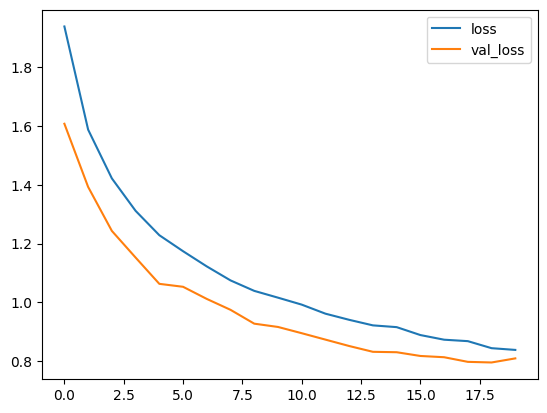

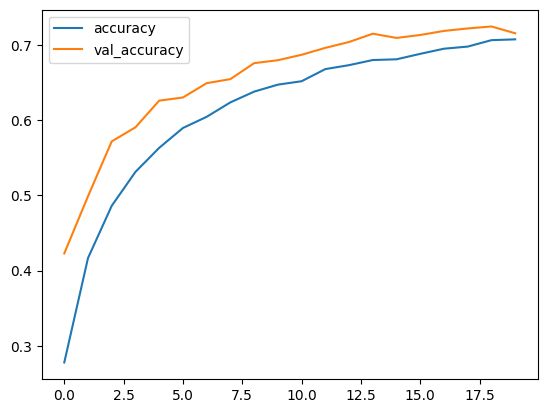

In [21]:
model_cifar_cinq = tf.keras.models.Sequential()
model_cifar_cinq.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar_cinq.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_cinq.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_cinq.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_cinq.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_cinq.add(tf.keras.layers.Dropout(0.25))
model_cifar_cinq.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar_cinq.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_cinq.add(tf.keras.layers.Dropout(0.25))
model_cifar_cinq.add(tf.keras.layers.Flatten())
model_cifar_cinq.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_cinq.add(tf.keras.layers.Dropout(0.5))
model_cifar_cinq.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar_cinq.add(tf.keras.layers.Dropout(0.5))
model_cifar_cinq.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_cinq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_cinq.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

l'apprentissage n'est pas améliorer sur la partie train

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


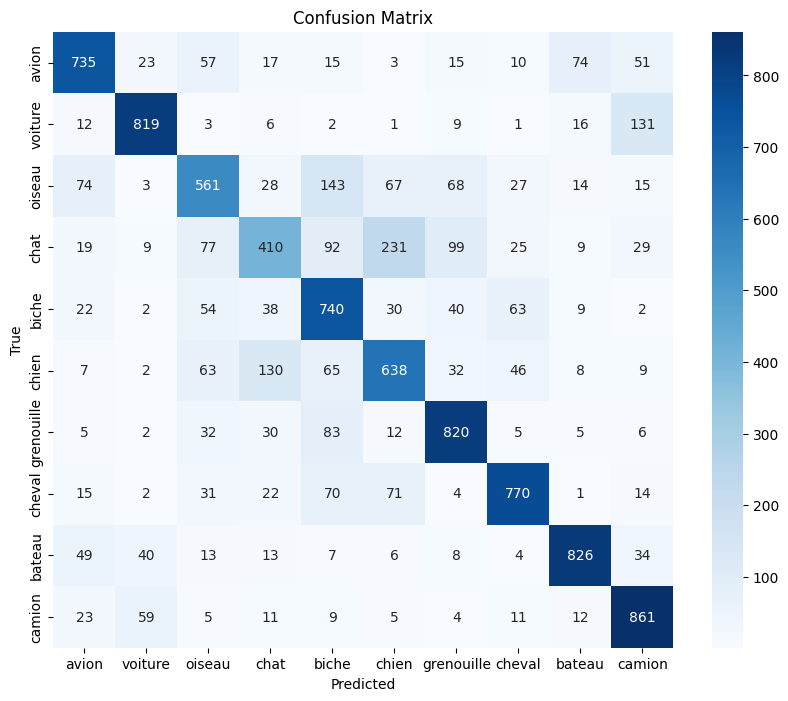

              precision    recall  f1-score   support

       avion       0.76      0.73      0.75      1000
     voiture       0.85      0.82      0.84      1000
      oiseau       0.63      0.56      0.59      1000
        chat       0.58      0.41      0.48      1000
       biche       0.60      0.74      0.66      1000
       chien       0.60      0.64      0.62      1000
  grenouille       0.75      0.82      0.78      1000
      cheval       0.80      0.77      0.78      1000
      bateau       0.85      0.83      0.84      1000
      camion       0.75      0.86      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000

Les trois catégories d'erreurs les plus fréquentes sont :
Vraie classe: voiture, Prédite: camion, Nombre d'erreurs: 131
Vraie classe: oiseau, Prédite: biche, Nombre d'erreurs: 143
Vraie classe: chat, Prédite: chien, Nombre d'erreurs: 231


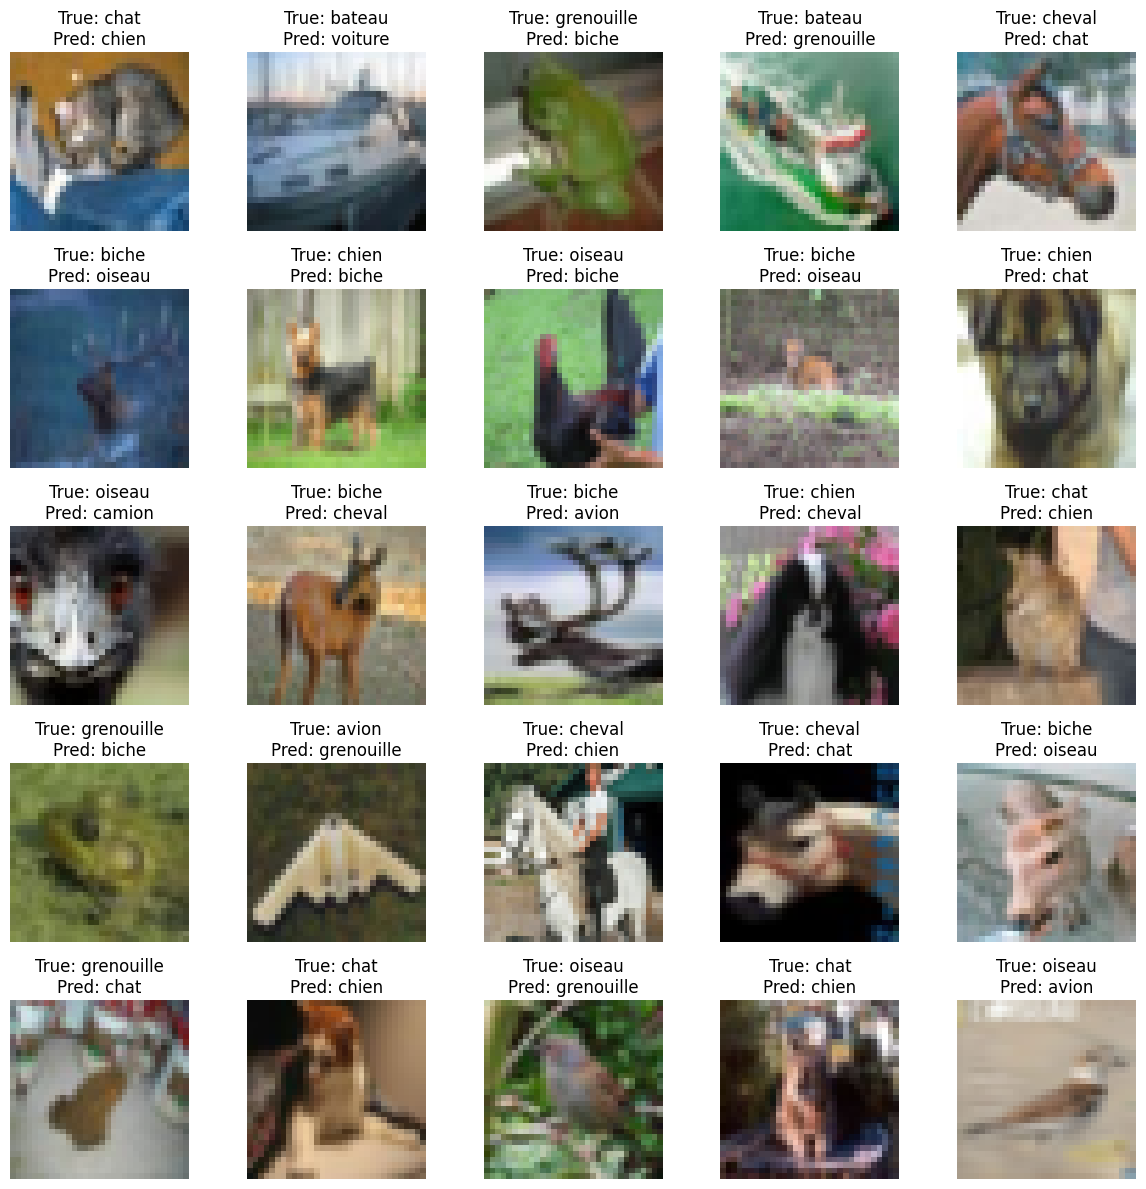

In [22]:
y_pred = model_cifar_cinq.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))

errors = np.where(y_pred_classes != y_true)[0]
error_counts = np.zeros((10, 10), dtype=int)

for i in errors:
    error_counts[y_true[i], y_pred_classes[i]] += 1

error_counts_flat = error_counts.flatten()
top_3_errors_indices = np.argsort(error_counts_flat)[-3:]
top_3_errors = [(index // 10, index % 10) for index in top_3_errors_indices]

print("Les trois catégories d'erreurs les plus fréquentes sont :")
for true_class, pred_class in top_3_errors:
    print(f"Vraie classe: {target_names[true_class]}, Prédite: {target_names[pred_class]}, Nombre d'erreurs: {error_counts[true_class, pred_class]}")

plt.figure(figsize=(12, 12))
for i, error_index in enumerate(errors[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[error_index])
    plt.title(f"True: {target_names[y_true[error_index]]}\nPred: {target_names[y_pred_classes[error_index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Etude de quelques modifications

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1561 - loss: 2.2011 - val_accuracy: 0.3393 - val_loss: 1.7332
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3268 - loss: 1.7563 - val_accuracy: 0.4413 - val_loss: 1.5090
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4139 - loss: 1.5780 - val_accuracy: 0.4811 - val_loss: 1.4108
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4699 - loss: 1.4459 - val_accuracy: 0.4722 - val_loss: 1.3784
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4978 - loss: 1.3779 - val_accuracy: 0.5469 - val_loss: 1.2475
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5302 - loss: 1.3005 - val_accuracy: 0.5877 - val_loss: 1.1369
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5528 - loss: 1.2478 - val_accuracy: 0.6087 - val_loss: 1.0902
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5712 - loss: 1.2058 - val_accu

<Axes: >

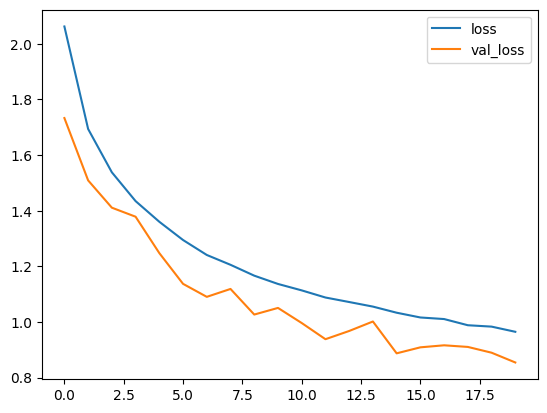

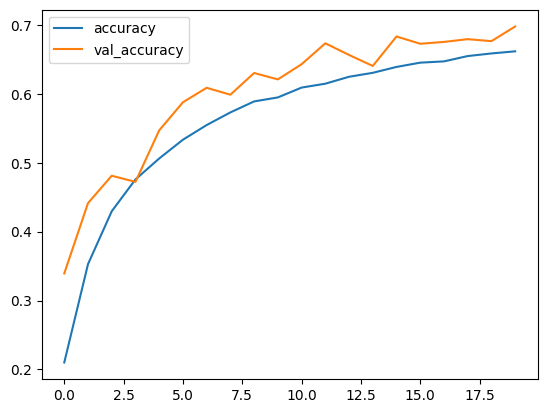

In [23]:
model_cifar_six = tf.keras.models.Sequential()
model_cifar_six.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar_six.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_six.add(tf.keras.layers.Dropout(0.25))
model_cifar_six.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_six.add(tf.keras.layers.Dropout(0.25))

model_cifar_six.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_six.add(tf.keras.layers.Dropout(0.25))
model_cifar_six.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cifar_six.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_six.add(tf.keras.layers.Dropout(0.25))

model_cifar_six.add(tf.keras.layers.Flatten())
model_cifar_six.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_six.add(tf.keras.layers.Dropout(0.5))
model_cifar_six.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar_six.add(tf.keras.layers.Dropout(0.5))
model_cifar_six.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_six.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_six.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le modèle converge de manière cohérente, sur la partie de test les résultats sont plutot bon avec une validation d'environ 66% et très peu de pertes.

La courbe de validation est un peu moins lisse, mais elle reste dans la même tendance que la partie train.

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.1867 - loss: 2.6451 - val_accuracy: 0.0952 - val_loss: 4.4655
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.3514 - loss: 1.7328 - val_accuracy: 0.2028 - val_loss: 2.4173
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4469 - loss: 1.5128 - val_accuracy: 0.5443 - val_loss: 1.2558
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5062 - loss: 1.3668 - val_accuracy: 0.5655 - val_loss: 1.1948
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5440 - loss: 1.2643 - val_accuracy: 0.5056 - val_loss: 1.3465
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5703 - loss: 1.1985 - val_accuracy: 0.5629 - val_loss: 1.2703
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5938 - loss: 1.1431 - val_accuracy: 0.6053 - val_loss: 1.1264
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6180 - loss: 1.0812 - val_acc

<Axes: >

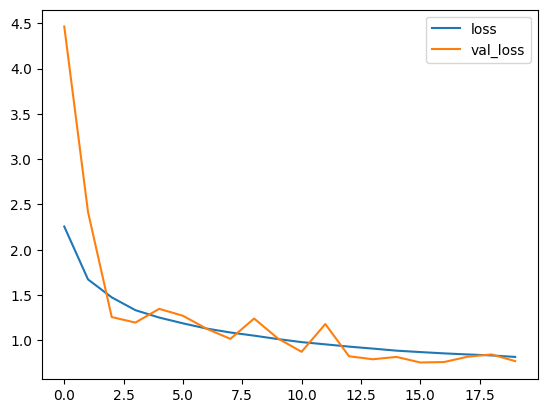

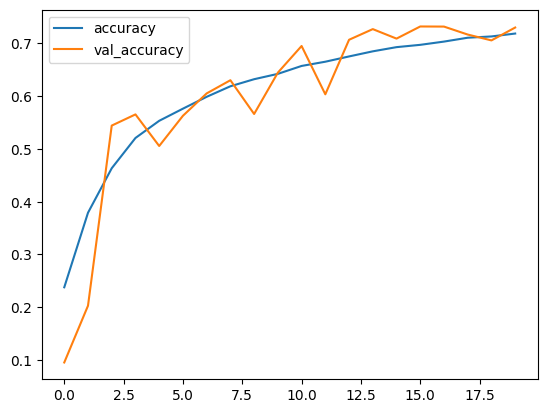

In [24]:
model_cifar_sept = tf.keras.models.Sequential()
model_cifar_sept.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model_cifar_sept.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_sept.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))

model_cifar_sept.add(tf.keras.layers.BatchNormalization(axis=-1))

model_cifar_sept.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model_cifar_sept.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_sept.add(tf.keras.layers.Dropout(0.25))
model_cifar_sept.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

model_cifar_sept.add(tf.keras.layers.BatchNormalization(axis=-1))

model_cifar_sept.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_sept.add(tf.keras.layers.Dropout(0.25))

model_cifar_sept.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cifar_sept.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_sept.add(tf.keras.layers.Dropout(0.25))
model_cifar_sept.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))

model_cifar_sept.add(tf.keras.layers.BatchNormalization(axis=-1))

model_cifar_sept.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar_sept.add(tf.keras.layers.Dropout(0.25))

model_cifar_sept.add(tf.keras.layers.Flatten())
model_cifar_sept.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar_sept.add(tf.keras.layers.Dropout(0.5))
model_cifar_sept.add(tf.keras.layers.Dense(128, activation='relu'))

model_cifar_sept.add(tf.keras.layers.BatchNormalization(axis=-1))

model_cifar_sept.add(tf.keras.layers.Dropout(0.5))
model_cifar_sept.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar_sept.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar_sept.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

on peut observer qu'au début le modele n'apprend pas très bien, pour la partie test la courbe d'accuracy est plutot bonne et réguliere, mais pour la partie validation le modele commence à bien apprendre aprèss plusieurs epochs mais je pense qu'il faudrait peut être augmenter le nombre d'epochs quand nous ajoutons les layers de normalisation.

In [25]:
errors = np.where(y_pred_classes != y_true)[0]
error_counts = np.zeros((10, 10), dtype=int)

for i in errors:
    error_counts[y_true[i], y_pred_classes[i]] += 1

error_counts_flat = error_counts.flatten()
top_2_errors_indices = np.argsort(error_counts_flat)[-2:]
top_2_errors = [(index // 10, index % 10) for index in top_3_errors_indices]

print("Les deux catégories d'erreurs les plus fréquentes sont :")
for true_class, pred_class in top_2_errors:
    print(f"Vraie classe: {target_names[true_class]}, Prédite: {target_names[pred_class]}, Nombre d'erreurs: {error_counts[true_class, pred_class]}")


Les deux catégories d'erreurs les plus fréquentes sont :
Vraie classe: voiture, Prédite: camion, Nombre d'erreurs: 131
Vraie classe: oiseau, Prédite: biche, Nombre d'erreurs: 143
Vraie classe: chat, Prédite: chien, Nombre d'erreurs: 231


c:\Users\cleme\Documents\Code\M1DENG\S2\BigData\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3547 - loss: 1.7845 - val_accuracy: 0.5244 - val_loss: 1.3480
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5482 - loss: 1.2629 - val_accuracy: 0.5798 - val_loss: 1.1880
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6061 - loss: 1.1004 - val_accuracy: 0.5895 - val_loss: 1.1658
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6519 - loss: 0.9839 - val_accuracy: 0.6298 - val_loss: 1.0457
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6846 - loss: 0.8927 - val_accuracy: 0.6521 - val_loss: 0.9962
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7142 - loss: 0.8198 - val_accuracy: 0.6580 - val_loss: 0.9976
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7293 - loss: 0.7631 - val_accuracy: 0.6700 - val_loss: 0.9765
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7613 - loss: 0.6869 - val_accuracy: 0.

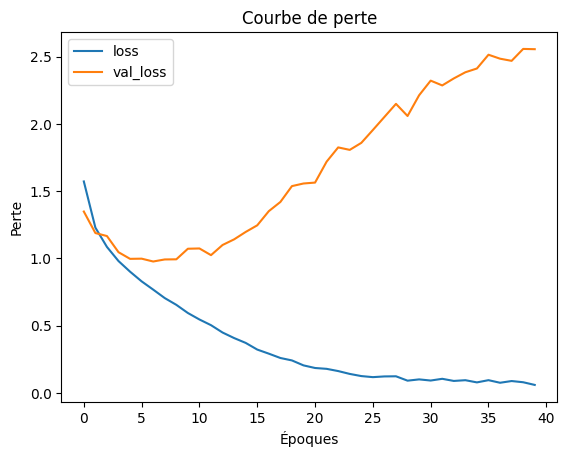

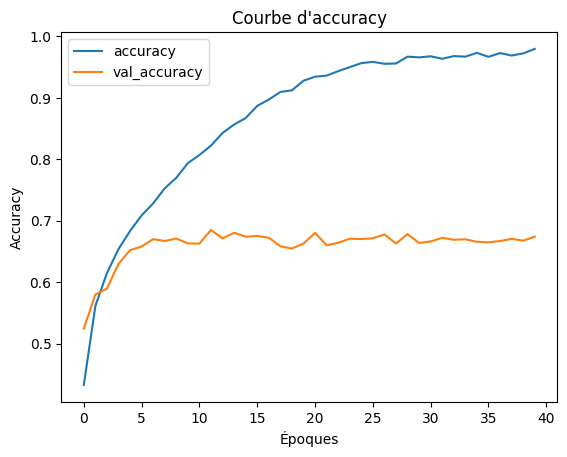

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
history = model.fit(X_train, y_train, epochs=40, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.show()

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Courbe d\'accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.show()


Sur le dernier modele on peut constater un fort surapprentissage avec une perte en teste proche de zero or lors de la validation la perte augmente vachement.

Quand on compare tous les modèles testés les modèles qui semble être les meilleures sont le model_cifar_deux ou model_cifar_six qui obtiennent des validation d'environs 70% grâce au Dropout et aux plusieurs couches de convolutions et ils ont tous deux moins de surapprentissage. 

en tenant compte du temps de calcul le model_cifar_deux se place alors à la premiere place avec un temps de calcul de seulement 48 secondes or le model_cifar_six à un temps d'une minute de plus.